In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv("Cluster by district.csv")
data

,District,Latitude,Longitude,surname
0,Kurigram,25.810347,89.648697,North Bengal
1,Jamalpur,24.923025,89.950111,North Bengal
2,Saidpur,25.778522,88.897377,North Bengal
3,Rangpur,25.744860,89.275589,North Bengal
4,Gazipur,23.999941,90.420273,Dhaka
5,Narayanganj,23.622641,90.499794,Dhaka
6,Dhaka,23.728783,90.393791,Dhaka
7,Chittagong,22.341900,91.815536,South Bengal
8,Feni,23.015913,91.397583,South Bengal
9,Chuadanga,23.643999,88.855637,West Bengal


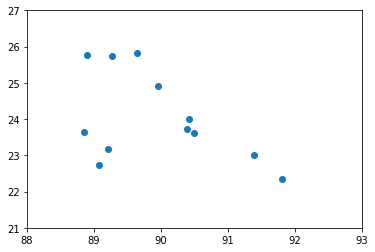

In [37]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(88,93)
plt.ylim(21,27)
plt.show()

In [4]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [5]:
#iloc er kaj holo data separet kora
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [10]:
kmeans = KMeans(3) #how many cluster we want
kmeans.fit(x) #which data use for cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#cluster result which predic with help of KMeans
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [13]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


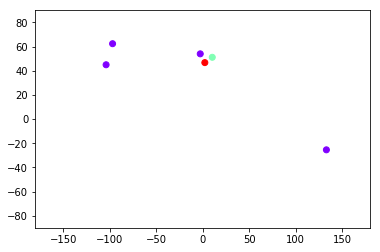

In [14]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c = data_with_clusters['Cluster'],cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()